# Análise das questões levantadas para as disciplinas do P1

#### Importando Bibliotecas

In [1]:
import pandas as pd
from statistics import mean, median, mode, stdev, variance
from os import listdir
from math import modf

In [2]:
import os
import sys
sys.path.append(os.path.abspath("util.py"))

import util
import util_extrator_padroes
import util_gerador_graficos 

#### Abrindo Arquivos CSV

In [3]:
discentes = util.retorna_discentes()

disciplinas = util.retorna_componentes_com_semestre()

matriculas_realizadas = util.retorna_matriculas()

matriculas_geral = util.retorna_matriculas()

In [4]:
discentes.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
0,18511024,8.18,1985.1,CONCLUÍDO,1988.2
1,18511029,7.70,1985.1,CONCLUÍDO,1988.2
2,18511030,9.22,1985.1,CONCLUÍDO,1988.2
3,18511033,8.31,1985.1,CONCLUÍDO,1988.2
4,18511035,8.06,1985.1,CONCLUÍDO,1988.2


In [5]:
discentes_depois = util.retorna_discentes_depois(discentes=discentes)

discentes_depois.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
483,10611013,8.36,2006.1,CONCLUÍDO,2010.1
484,10611008,8.82,2006.1,CONCLUÍDO,2009.2
485,10611431,8.28,2006.1,CONCLUÍDO,2008.2
486,10611011,8.77,2006.1,CONCLUÍDO,2009.2
487,10611015,8.49,2006.1,CONCLUÍDO,2010.2


In [6]:
matriculas_discentes = discentes_depois['matricula'].to_list()

matriculas_discentes[:5]

[10611013, 10611008, 10611431, 10611011, 10611015]

In [7]:
disciplinas.head()

,codigo,nome,ch_total,semestre
0,1101101,COMPLEMENTOS EM FISICA GERAL I,30,NaN
1,1101107,ESTRUTURA DA MATÉRIA I,60,NaN
2,1101117,FISICA GERAL I,90,NaN
3,1101118,FISICA GERAL II,90,NaN
4,1101119,FISICA GERAL III,90,NaN


In [8]:
disciplinas.count()

codigo      291
nome        291
ch_total    291
semestre     62
dtype: int64

In [9]:
periodo_rec = 1

In [10]:
disciplinas = disciplinas[disciplinas['semestre'] == periodo_rec]
disciplinas.count()

codigo      7
nome        7
ch_total    7
semestre    7
dtype: int64

In [11]:
codigos_disciplinas = disciplinas['codigo'].to_list()

codigos_disciplinas[:5]

['1101167', '1101171', '1103114', '1103118', '1103177']

In [12]:
matriculas_realizadas.head()

,matricula,periodo_matricula,codigo_componente,descricao,media_final
0,10011003,2000.1,1103114,APROVADO,9.7
1,10011003,2000.1,1107137,APROVADO,10.0
2,10011003,2000.1,1103118,APROVADO,9.8
3,10011003,2000.1,1107136,APROVADO,10.0
4,10011003,2000.1,1101117,APROVADO,10.0


### Filtrando as matrículas nas quais os alunos obtiveram sucesso

In [13]:
matriculas_realizadas.count()

matricula            37767
periodo_matricula    37767
codigo_componente    37767
descricao            37767
media_final          35939
dtype: int64

In [14]:
aux = pd.DataFrame()

In [15]:
aux.empty

True

In [16]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVADO'])

In [17]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'DISPENSADO'])

In [18]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'MATRICULADO'])

In [19]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVEITADO'])

In [20]:
matriculas_realizadas = None

matriculas_realizadas = aux

matriculas_realizadas.count()

matricula            33295
periodo_matricula    33295
codigo_componente    33295
descricao            33295
media_final          33256
dtype: int64

### Tratando disciplinas com mais de um registro

Disciplinas que precisam desse tratamento:

* LOGICA APLC A COMPUTACAO e LOGICA APLICADA A COMPUTACAO

* CALCULO NUMERICO (sem nenhuma matricula) e CALCULO NUMERICO e CALCULO NUMERICO

* INTRODUCAO AO PROC DIGITAL DE IMAGENS e INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS

* ARQUITETURA DE COMPUTADORES II e ARQUITETURA DE COMPUTADORES II

* ADM SIST DE INFORMACOES e ADMINISTRACAO DE SISTEMAS DE INFORMACAO

* CONSTRUCAO DE COMPILADORES I e CONSTRUÇÃO DE COMPILADORES I

* REDES DE COMPUTADORES I e REDES DE COMPUTADORES I

* ESTÁGIO SUPERVISIONADO e ESTAGIO SUPERVISIONADO

* FISICA APLICADA A COMPUTACAO I (de 60 creditos e de 90 creditos)

* FISICA APLICADA A COMPUTACAO II (de 60 creditos e de 90 creditos)

* CALCULO I (de 60 creditos e de 90 creditos)

* CALCULO II (de 60 creditos e de 90 creditos)

* CALCULO III (de 60 creditos e de 90 creditos)

* CIRCUITOS (de 60 creditos e de 90 creditos)

* INTRODUCAO A ALGEBRA LINEAR e ALGEBRA LIN GEO ANALITICA 

In [21]:
fisica1 = []
fisica1 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO I']['codigo'].to_list()
print(fisica1)

calc1 = []
calc1 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL I']['codigo'].to_list()
print(calc1)

'''fisica2 = []
fisica2 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO II']['codigo'].to_list()
print(fisica2)

calc2 = []
calc2 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL II']['codigo'].to_list()
print(calc2)

algebra = []
algebra.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO A ALGEBRA LINEAR']['codigo'].iloc[0])
algebra.append(disciplinas[disciplinas['nome'] == 'ALGEBRA LIN GEO ANALITICA']['codigo'].iloc[0])
print(algebra)

logica = []
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLC A COMPUTACAO']['codigo'].iloc[0])
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLICADA A COMPUTACAO']['codigo'].iloc[0])
print(logica)
'''
'''calc3 = []
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIF  E INTEGRAL III']['codigo'].iloc[0])
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL III']['codigo'].iloc[0])
print(calc3)

cl = []
cl = disciplinas[disciplinas['nome'] == 'CIRCUITOS LOGICOS']['codigo'].to_list()
print(cl)'''

'''numerico = []
numerico = disciplinas[disciplinas['nome'] == 'CALCULO NUMERICO']['codigo'].to_list()
print(numerico)

pdi = []
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO AO PROC DIGITAL DE IMAGENS']['codigo'].iloc[0])
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS']['codigo'].iloc[0])
print(pdi)'''

'''arq2 = []
arq2 = disciplinas[disciplinas['nome'] == 'ARQUITETURA DE COMPUTADORES II']['codigo'].to_list()
print(arq2)'''

'''redes = []
redes = disciplinas[disciplinas['nome'] == 'REDES DE COMPUTADORES I']['codigo'].to_list()
print(redes)

admsi = []
admsi.append(disciplinas[disciplinas['nome'] == 'ADM SIST DE INFORMACOES']['codigo'].iloc[0])
admsi.append(disciplinas[disciplinas['nome'] == 'ADMINISTRACAO DE SISTEMAS DE INFORMACAO']['codigo'].iloc[0])
print(admsi)

comp = []
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUCAO DE COMPILADORES I']['codigo'].iloc[0])
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUÇÃO DE COMPILADORES I']['codigo'].iloc[0])
print(comp)'''

'''estagio = []
estagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])
estagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])
print(estagio)'''

['1101167', '1101171']
['1103114', '1103177']


"estagio = []\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])\nprint(estagio)"

In [22]:
fisica1_aux, matriculas_realizadas = util.mapeia_disciplina(fisica1.copy(), matriculas_realizadas)
calc1_aux, matriculas_realizadas = util.mapeia_disciplina(calc1.copy(), matriculas_realizadas)

fisica1_aux, matriculas_geral = util.mapeia_disciplina(fisica1.copy(), matriculas_geral)
calc1_aux, matriculas_geral = util.mapeia_disciplina(calc1.copy(), matriculas_geral)

'''fisica2_aux, matriculas_realizadas = util.mapeia_disciplina(fisica2.copy(), matriculas_realizadas)
calc2_aux, matriculas_realizadas = util.mapeia_disciplina(calc2.copy(), matriculas_realizadas)
algebra_aux, matriculas_realizadas = util.mapeia_disciplina(algebra.copy(), matriculas_realizadas)
logica_aux, matriculas_realizadas = util.mapeia_disciplina(logica.copy(), matriculas_realizadas)

fisica2_aux, matriculas_geral = util.mapeia_disciplina(fisica2.copy(), matriculas_geral)
calc2_aux, matriculas_geral = util.mapeia_disciplina(calc2.copy(), matriculas_geral)
algebra_aux, matriculas_geral = util.mapeia_disciplina(algebra.copy(), matriculas_geral)
logica_aux, matriculas_geral = util.mapeia_disciplina(logica.copy(), matriculas_geral)'''

'''calc3, matriculas_realizadas = util.mapeia_disciplina(calc3.copy(), matriculas_realizadas)
cl, matriculas_realizadas = util.mapeia_disciplina(cl.copy(), matriculas_realizadas)'''

'''numerico, matriculas_realizadas = util.mapeia_disciplina(numerico.copy(), matriculas_realizadas)
pdi, matriculas_realizadas = util.mapeia_disciplina(pdi.copy(), matriculas_realizadas)'''

'''arq2, matriculas_realizadas = util.mapeia_disciplina(arq2.copy(), matriculas_realizadas)'''

'''redes, matriculas_realizadas = util.mapeia_disciplina(redes.copy(), matriculas_realizadas)
admsi, matriculas_realizadas = util.mapeia_disciplina(admsi.copy(), matriculas_realizadas)
comp, matriculas_realizadas = util.mapeia_disciplina(comp.copy(), matriculas_realizadas)'''

'''estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'''

Disciplina(s) ['1101167'] mapeadas para o código 1101171
Disciplina(s) ['1103114'] mapeadas para o código 1103177
Disciplina(s) ['1101167'] mapeadas para o código 1101171
Disciplina(s) ['1103114'] mapeadas para o código 1103177


'estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'

### Disciplinas que serão analisadas

In [23]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])
    
codigos_disciplinas.remove('1101167')
codigos_disciplinas.remove('1103114')

1101167
FISICA APLICADA A COMPUTACAO I
1101171
FISICA APLICADA A COMPUTACAO I
1103114
CALCULO DIFERENCIAL E INTEGRAL I
1103118
CALCULO VET GEO ANALITICA
1103177
CALCULO DIFERENCIAL E INTEGRAL I
1107136
INTRODUCAO A PROGRAMACAO
1107137
INTRODUCAO AO COMPUTADOR


In [24]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])

1101171
FISICA APLICADA A COMPUTACAO I
1103118
CALCULO VET GEO ANALITICA
1103177
CALCULO DIFERENCIAL E INTEGRAL I
1107136
INTRODUCAO A PROGRAMACAO
1107137
INTRODUCAO AO COMPUTADOR


### Gerando relatório

In [25]:
relatorio = []

for codigo in codigos_disciplinas:
    
    relatorio_disciplina = {'nome': None, 'rec': None, 'nao_rec': None, 'alunos_nao_rec': []}

    aux = matriculas_realizadas[matriculas_realizadas['codigo_componente'] == codigo]

    disciplina = disciplinas[disciplinas['codigo'] == codigo]['nome'].iloc[0]

    periodo_recomendado = int(disciplinas[disciplinas['codigo'] == codigo]['semestre'].iloc[0])

    relatorio_disciplina['nome'] = disciplina

    matriculas = aux.count().iloc[0]
        
    #matriculas = 1

    rec = 0
    nao_rec = 0
    
    alunos_nao_rec = []

    for row in aux.iterrows():

        #print(row[1])
        #print()

        aluno = row[1]['matricula']

        if aluno not in matriculas_discentes:
            matriculas -= 1
            continue

        else:
                
            periodo_matricula = row[1]['periodo_matricula']
            periodo_ingresso = discentes_depois[discentes_depois['matricula'] == aluno]['periodo_ingresso'].iloc[0]

            periodo_cursou = util.retorna_tempo_graduacao(periodo_ingresso, periodo_matricula)

            #print('rec: {} matri: {} ingre: {} cursou: {}'.format(periodo_recomendado, periodo_matricula, periodo_ingresso, periodo_cursou))

            if periodo_cursou == periodo_recomendado:
                rec += 1

            else:
                nao_rec += 1
                alunos_nao_rec.append(aluno)
                    
            #matriculas += 1

    
    relatorio_disciplina['rec'] = rec/matriculas
    relatorio_disciplina['nao_rec'] = nao_rec/matriculas
    relatorio_disciplina['alunos_nao_rec'] = alunos_nao_rec
    print(matriculas)
    
    relatorio.append(relatorio_disciplina)

219
219
219
219
219


### Analisando Introdução ao Computador

In [26]:
codigo = '1107137'

In [27]:
print(relatorio[4]['nome'])

alunos_nao_rec = relatorio[4]['alunos_nao_rec']

alunos_nao_rec

INTRODUCAO AO COMPUTADOR


[10921372,
 11118146,
 11218638,
 11311862,
 10611015,
 10621014,
 10621235,
 10621364,
 11021068]

In [28]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
576   10921372  8.01            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16006   10921372             2011.1           1107137  APROVADO          7.5

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
624   11118146  8.1            2011.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18850   11118146             2011.1           1107137  TRANCADO          0.0
18854   11118146             2011.2           1107137  APROVADO          6.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
651   11218638  8.75            2012.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21097   11218638             2012.2           1107137  APROVADO          8.8

     matricula   cra  periodo_ingresso  descri

In [29]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [30]:
aux

[0.0, 0.8888888888888888, 0.0, 0.1111111111111111]

In [31]:
sum(aux)

1.0

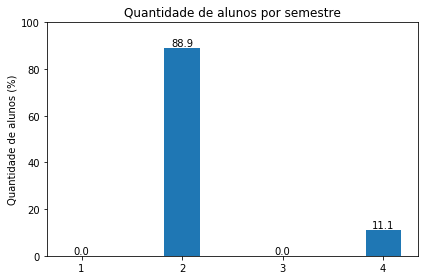

In [32]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [33]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [34]:
aux

{'APROVADO': 0.3333333333333333,
 'TRANCADO': 0.2222222222222222,
 'DISPENSADO': 0.3333333333333333,
 'REP. FALTA': 0.1111111111111111}

### Analisando Introdução a Prog

In [35]:
codigo = '1107136'

In [36]:
print(relatorio[3]['nome'])

alunos_nao_rec = relatorio[3]['alunos_nao_rec']

alunos_nao_rec

INTRODUCAO A PROGRAMACAO


[10711027,
 10711029,
 10721015,
 10921072,
 10921372,
 10921378,
 11021057,
 11021059,
 11021067,
 11021445,
 11021593,
 11111298,
 11118146,
 11118204,
 11118209,
 11121191,
 11121223,
 11121705,
 11121911,
 11121912,
 11121914,
 11218638,
 11218649,
 11221240,
 11221998,
 11318739,
 10621235,
 10621363]

In [37]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
519   10711027  7.75            2007.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
13162   10711027             2007.1           1107136  REPROVADO          4.8
13172   10711027             2007.2           1107136   APROVADO          7.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
524   10711029  7.29            2007.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
13281   10711029             2007.1           1107136  REPROVADO          4.8
13286   10711029             2007.2           1107136   APROVADO          6.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
536   10721015  8.08            2007.2  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
13712   10721015             2007.2   

       matricula  periodo_matricula codigo_componente  descricao  media_final
21605   11221240             2012.2           1107136  REPROVADO          3.8
21611   11221240             2013.1           1107136   APROVADO          8.6

     matricula  cra  periodo_ingresso         descricao  periodo_conclusao
666   11221998  5.1            2012.2  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
21792   11221998             2012.2           1107136  REPROVADO          3.1
21801   11221998             2013.1           1107136   APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
673   11318739  7.54            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
22480   11318739             2013.1           1107136  REPROVADO          2.4
22489   11318739             2013.2           1107136   APROVADO          9.4

     ma

In [38]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [39]:
aux

[0.0, 0.8928571428571429, 0.10714285714285714]

In [40]:
sum(aux)

1.0

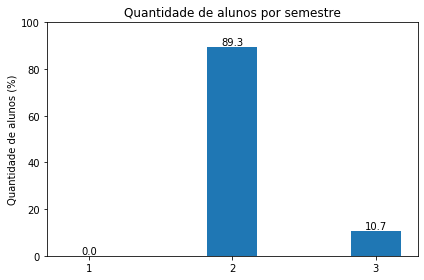

In [41]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [42]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [43]:
aux

{'REPROVADO': 0.75,
 'REP. FALTA': 0.07142857142857142,
 'TRANCADO': 0.14285714285714285,
 'DISPENSADO': 0.03571428571428571}

### Analisando Calc I

In [44]:
codigo = '1103177'

In [45]:
print(relatorio[2]['nome'])

alunos_nao_rec = relatorio[2]['alunos_nao_rec']

alunos_nao_rec

CALCULO DIFERENCIAL E INTEGRAL I


[10621015,
 10711018,
 10711029,
 10711032,
 10721015,
 10821251,
 10821361,
 10921063,
 11011836,
 11021057,
 11021059,
 11021063,
 11021067,
 11021445,
 11021452,
 11021593,
 11021633,
 11118146,
 11118199,
 11121191,
 11121216,
 11121219,
 11121223,
 11121694,
 11121705,
 11121911,
 11121912,
 11121914,
 11218562,
 11218638,
 11218640,
 11218649,
 11221998,
 11228207,
 11311014,
 11318739,
 11328386,
 10621235,
 10621363]

In [46]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
11957   10621015             2006.2           1103177  REP. FALTA          0.0
11964   10621015             2007.1           1103177    APROVADO          5.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
531   10711018  6.69            2007.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
13034   10711018             2007.1           1103177  REPROVADO          4.1
13038   10711018             2007.2           1103177   APROVADO          7.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
524   10711029  7.29            2007.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
13278   10711029             2007.1

       matricula  periodo_matricula codigo_componente  descricao  media_final
19706   11121219             2011.2           1103177  REPROVADO          3.1
19714   11121219             2012.1           1103177   APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
631   11121223  6.62            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
19844   11121223             2011.2           1103177  REPROVADO          1.6
19857   11121223             2012.2           1103177   APROVADO          6.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
644   11121694  6.43            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
19916   11121694             2011.2           1103177  REPROVADO          2.3
19920   11121694             2012.1           1103177   APROVADO          6.6

     matricula   cr

In [47]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [48]:
aux

[0.0,
 0.8461538461538461,
 0.07692307692307693,
 0.02564102564102564,
 0.05128205128205128]

In [49]:
sum(aux)

1.0

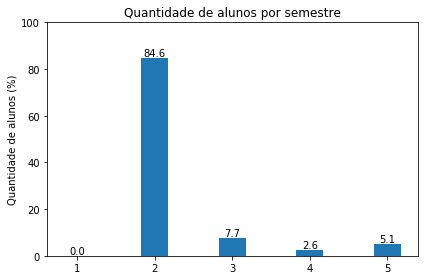

In [50]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [51]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [52]:
aux

{'REP. FALTA': 0.15384615384615385,
 'REPROVADO': 0.717948717948718,
 'TRANCADO': 0.10256410256410256,
 'DISPENSADO': 0.02564102564102564}

### Analisando Calc Vet

In [53]:
codigo = '1103118'

In [54]:
print(relatorio[1]['nome'])

alunos_nao_rec = relatorio[1]['alunos_nao_rec']

alunos_nao_rec

CALCULO VET GEO ANALITICA


[10621015,
 10621028,
 10721015,
 10811031,
 10821361,
 10921360,
 10921363,
 11011060,
 11011068,
 11011836,
 11021059,
 11021067,
 11021593,
 11118146,
 11118199,
 11118204,
 11118209,
 11121191,
 11121216,
 11121223,
 11121694,
 11121911,
 11128089,
 11218638,
 11218797,
 11221240,
 11221826,
 11221998,
 11228207,
 10621235]

In [55]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
11961   10621015             2006.2           1103118  REPROVADO          3.3
11966   10621015             2007.1           1103118   APROVADO          8.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
508   10621028  7.28            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
12239   10621028             2006.2           1103118  REPROVADO          2.3
12246   10621028             2007.1           1103118   APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
536   10721015  8.08            2007.2  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
13710   10721015             2007.2   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
636   11128089  5.35            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20384   11128089             2011.2           1103118  REP. FALTA          0.0
20388   11128089             2012.1           1103118   REPROVADO          1.8
20413   11128089             2013.2           1103118    APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
651   11218638  8.75            2012.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21095   11218638             2012.1           1103118  TRANCADO          NaN
21100   11218638             2012.2           1103118  APROVADO         8.08

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
656   11218797  6.82            2012.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula c

In [56]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [57]:
aux

[0.0,
 0.6,
 0.3,
 0.03333333333333333,
 0.03333333333333333,
 0.0,
 0.03333333333333333]

In [58]:
sum(aux)

0.9999999999999999

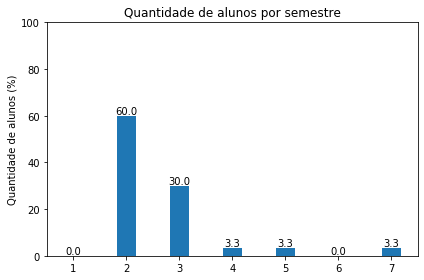

In [59]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [60]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [61]:
aux

{'REPROVADO': 0.6333333333333333,
 'APROVADO': 0.06666666666666667,
 'TRANCADO': 0.1,
 'REP. FALTA': 0.2}

### Analisando Física I

In [62]:
codigo = '1101171'

In [63]:
print(relatorio[0]['nome'])

alunos_nao_rec = relatorio[0]['alunos_nao_rec']

alunos_nao_rec

FISICA APLICADA A COMPUTACAO I


[10621028,
 10621030,
 10621363,
 10621364,
 10711021,
 10711027,
 10711029,
 10711032,
 10711469,
 10721015,
 10721244,
 10811060,
 10811438,
 10821060,
 10821063,
 10821251,
 10821361,
 11011089,
 11011829,
 11021067,
 11021068,
 11021593,
 11111298,
 11118146,
 11118204,
 11121191,
 11121223,
 11121911,
 11121912,
 11211425,
 11218638,
 11218640,
 11218649,
 11218797,
 11221240,
 11221826,
 11221998,
 11228207,
 11311009,
 11318739,
 11409543,
 11511184,
 11512971,
 10621030,
 10721026,
 11111299,
 11311014]

In [64]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
508   10621028  7.28            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
12242   10621028             2006.2           1101171  REPROVADO          3.4
12249   10621028             2007.1           1101171   APROVADO          6.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
510   10621030  6.86            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
12298   10621030             2006.2           1101171   REPROVADO          3.8
12304   10621030             2007.1           1101171    APROVADO          5.7
12353   10621030             2010.2           1101171  DISPENSADO          5.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
503   10621363  7.13            2006.2  CONCLUÍDO             2009.2
       matricula  periodo_matricul

       matricula  periodo_matricula codigo_componente   descricao  media_final
18338   11111298             2011.1           1101171  REP. FALTA         0.00
18343   11111298             2011.2           1101171   REPROVADO         4.07
18348   11111298             2012.1           1101171    APROVADO         8.50

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
624   11118146  8.1            2011.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18852   11118146             2011.1           1101171  TRANCADO         0.00
18857   11118146             2011.2           1101171  APROVADO         7.03

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
618   11118204  4.76            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19133   11118204             2011.1           1101171  REP. FALTA          0.0
19138   11118204   

       matricula  periodo_matricula codigo_componente  descricao  media_final
23834   11511184             2015.1           1101171  REPROVADO          1.1
23856   11511184             2016.1           1101171   APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
696   11512971  7.98            2015.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
23920   11512971             2017.1           1101171  APROVADO          5.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
510   10621030  6.86            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
12298   10621030             2006.2           1101171   REPROVADO          3.8
12304   10621030             2007.1           1101171    APROVADO          5.7
12353   10621030             2010.2           1101171  DISPENSADO          5.7

     matricula  c

In [65]:
mat_estranho = 11011089
alunos_nao_rec.remove(mat_estranho)

In [66]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [67]:
aux

[0.0,
 0.6304347826086957,
 0.10869565217391304,
 0.06521739130434782,
 0.043478260869565216,
 0.0,
 0.043478260869565216,
 0.021739130434782608,
 0.0,
 0.043478260869565216,
 0.043478260869565216]

In [68]:
sum(aux)

0.9999999999999999

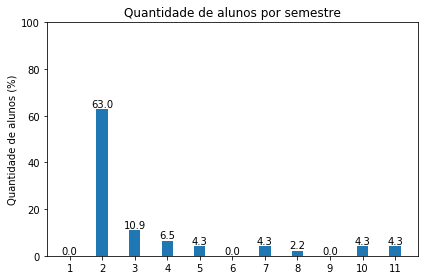

In [69]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

#tem um aluno com dois aprovados, um deles no primeiro semestre olhar dps

In [70]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [71]:
aux

{'REPROVADO': 0.5652173913043478,
 'TRANCADO': 0.13043478260869565,
 'REP. FALTA': 0.2391304347826087,
 'APROVADO': 0.021739130434782608,
 'EXCLUIDA': 0.021739130434782608,
 'DISPENSADO': 0.021739130434782608}

In [72]:
discentes_depois[discentes_depois['matricula'] == 10721026]

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
534,10721026,8.8,2007.2,CONCLUÍDO,2011.2


In [73]:
aux = matriculas_geral[matriculas_geral['codigo_componente'] == codigo]
aux[aux['matricula'] == 10721026]

,matricula,periodo_matricula,codigo_componente,descricao,media_final
13816,10721026,2007.2,1101171,EXCLUIDA,7.1
13845,10721026,2010.2,1101171,DISPENSADO,7.1
